# Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning

## Import Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'marketing_campaign_data.csv')
pd.set_option('display.max_columns', None)
df

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [6]:
df = df.drop(['Unnamed: 0'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


## Explorartory Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [52]:
sum_missing = df.isna().sum()
percent_missing = round(df.isnull().sum() *100 / len(df),2)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'sum_missing': sum_missing,
                                 'percent_missing': percent_missing}).reset_index(drop=True).sort_values(by=['percent_missing','sum_missing'], ascending=False)
missing_value_df

,column_name,sum_missing,percent_missing
4,Income,24,1.07
0,ID,0,0.00
1,Year_Birth,0,0.00
2,Education,0,0.00
3,Marital_Status,0,0.00
5,Kidhome,0,0.00
6,Teenhome,0,0.00
7,Dt_Customer,0,0.00
8,Recency,0,0.00
9,MntCoke,0,0.00


In [10]:
df_income = df[df['Income'].isna()]
df_income.head(100)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,S1,Menikah,NaN,1,0,15-11-2013,11,5000,5000,6000,0,2000,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,S1,Lajang,NaN,1,0,20-02-2013,19,5000,1000,3000,3000,263000,362000,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,S3,Lajang,NaN,0,0,05-11-2013,80,81000,11000,50000,3000,2000,39000,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,S1,Lajang,NaN,2,1,01-01-2014,96,48000,5000,48000,6000,10000,7000,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,S1,Lajang,NaN,1,0,17-06-2013,57,11000,3000,22000,2000,2000,6000,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,D3,Menikah,NaN,1,0,14-09-2012,25,25000,3000,43000,17000,4000,17000,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,S3,Menikah,NaN,2,1,19-11-2012,4,230000,42000,192000,49000,37000,53000,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,S1,Lajang,NaN,1,1,27-05-2014,45,7000,0,8000,2000,0,1000,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,S2,Bertunangan,NaN,0,0,23-11-2013,87,445000,37000,359000,98000,28000,18000,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,S3,Menikah,NaN,0,1,11-07-2013,23,352000,0,27000,10000,0,15000,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0
MntFishProducts,2240.0,3.752545e+04,5.462898e+04,0.0,3000.00,12000.0,50000.00,259000.0


### Feature Engineering

#### conversion_rate

In [12]:
df1 = df.copy()

In [74]:
df1['conversion'] = round(((df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5'] + df1['Response'])/df['NumWebVisitsMonth']),1)

In [89]:
df1.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0.1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0.0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0.0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0.0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0.0
5,7446,1967,S2,Bertunangan,62513000.0,0,1,09-09-2013,16,520000,42000,98000,0,42000,14000,2,6,4,10,6,0,0,0,0,0,0,3,11,0,0.0
6,965,1971,S1,Cerai,55635000.0,0,1,13-11-2012,34,235000,65000,164000,50000,49000,27000,4,7,3,7,6,0,0,0,0,0,0,3,11,0,0.0
7,6177,1985,S3,Menikah,33454000.0,1,0,08-05-2013,32,76000,10000,56000,3000,1000,23000,2,4,0,4,8,0,0,0,0,0,0,3,11,0,0.0
8,4855,1974,S3,Bertunangan,30351000.0,1,0,06-06-2013,19,14000,0,24000,3000,3000,2000,1,3,0,2,9,0,0,0,0,0,0,3,11,1,0.1
9,5899,1950,S3,Bertunangan,5648000.0,1,1,13-03-2014,68,28000,0,6000,1000,1000,13000,1,1,0,0,20,1,0,0,0,0,0,3,11,0,0.0


In [92]:
df_inf = df1[df1['conversion'].isna()]
df_inf

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion
164,8475,1973,S3,Menikah,157243000.0,0,1,01-03-2014,98,20000,2000,1582000,1000,2000,1000,15,0,22,0,0,0,0,0,0,0,0,3,11,0,NaN
655,5555,1975,S1,Cerai,153924000.0,0,0,07-02-2014,81,1000,1000,1000,1000,1000,1000,0,0,0,0,0,0,0,0,0,0,0,3,11,0,NaN
687,1501,1982,S3,Menikah,160803000.0,0,0,04-08-2012,21,55000,16000,1622000,17000,3000,4000,15,0,28,1,0,0,0,0,0,0,0,3,11,0,NaN
905,11074,1977,S1,Lajang,85072000.0,0,0,09-04-2014,94,494000,92000,391000,194000,11000,241000,1,3,4,10,0,0,0,0,0,0,0,3,11,0,NaN
975,10286,1962,S1,Menikah,83715000.0,0,0,03-02-2014,2,318000,8000,407000,150000,35000,8000,1,2,8,13,0,0,0,0,0,0,0,3,11,0,NaN
1773,8584,1952,S3,Bertunangan,85431000.0,0,0,08-06-2013,54,376000,53000,462000,168000,53000,53000,1,2,7,7,0,0,0,0,0,0,0,3,11,0,NaN
1806,6237,1966,S3,Lajang,7144000.0,0,2,07-12-2013,92,81000,4000,33000,5000,2000,291000,0,23,1,1,0,0,0,0,0,0,0,3,11,0,NaN
1910,5832,1960,D3,Bertunangan,92556000.0,0,0,20-04-2014,32,493000,183000,352000,184000,23000,28000,0,3,5,13,0,0,0,0,0,0,0,3,11,0,NaN
1955,6428,1950,S3,Janda,76842000.0,0,0,03-05-2014,37,605000,10000,345000,84000,54000,32000,1,1,8,7,0,0,0,0,0,0,0,3,11,0,NaN
2132,11181,1949,S3,Menikah,156924000.0,0,0,29-08-2013,85,2000,1000,2000,1000,1000,1000,0,0,0,0,0,0,0,0,0,0,0,3,11,0,NaN


In [88]:
df1['conversion'].describe()

count    2230.0
mean        inf
std         NaN
min         0.0
25%         0.0
50%         0.0
75%         0.1
max         inf
Name: conversion, dtype: float64

In [ ]:
df_con = df1[df1['conversion'] > 0]

#### total_children

In [76]:
df2 = df1.copy()

In [77]:
df2['total_children'] = df2['Kidhome'] + df2['Teenhome']

#### Age

In [78]:
df3 = df2.copy()

In [79]:
df3['age'] = 2022 - df3['Year_Birth']

In [80]:
df3['age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: age, dtype: float64

In [81]:
df_old = df3[df3['age'] > 85]
df_old

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,conversion,total_children,age
192,7829,1900,D3,Cerai,36640000.0,1,0,26-09-2013,99,15000,6000,8000,7000,4000,25000,1,2,1,2,5,0,0,0,0,0,1,3,11,0,0.0,1,122
239,11004,1893,D3,Lajang,60182000.0,0,1,17-05-2014,23,8000,0,5000,7000,0,2000,1,1,0,2,4,0,0,0,0,0,0,3,11,0,0.0,1,129
339,1150,1899,S3,Bertunangan,83532000.0,0,0,26-09-2013,36,755000,144000,562000,104000,64000,224000,1,4,6,4,1,0,0,1,0,0,0,3,11,0,1.0,0,123


#### age_cat

In [82]:
df4 = df3.copy()

In [83]:
age_cond = [(df4['age'] <= 25),
            (df4['age'] > 25) & (df4['age'] <= 40),
            (df4['age'] > 40) & (df4['age'] <= 56),
            (df4['age'] > 56) & (df4['age'] <= 75),
            (df4['age'] > 75)]

age_res = ['Gen Z', 'Millenials', 'Gen X', 'Boomers', 'Silent Gen']

df4['age_cat'] = np.select(age_cond, age_res)

#### purchase_online

In [84]:
df5 = df4.copy()

In [85]:
df5['puchase_online'] = df5['NumDealsPurchases'] + df5['NumWebPurchases'] + df5['NumCatalogPurchases']

### Correlations

In [86]:
cate = ['Education', 'Marital_Status','Income','Recency','puchase_online','NumStorePurchases','age_cat','age']

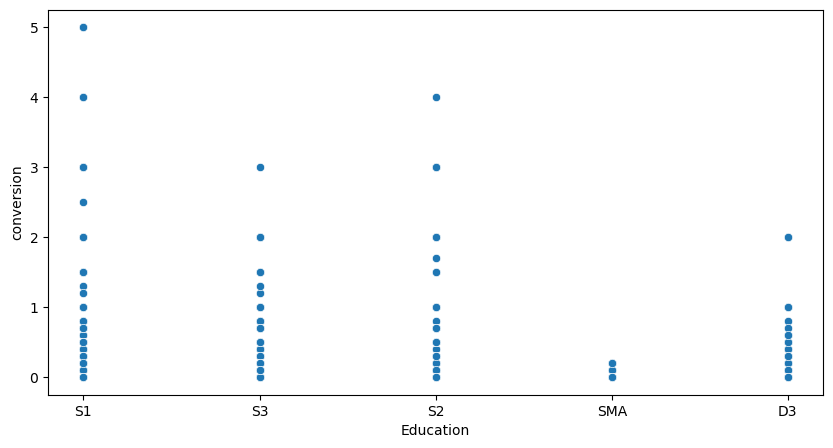

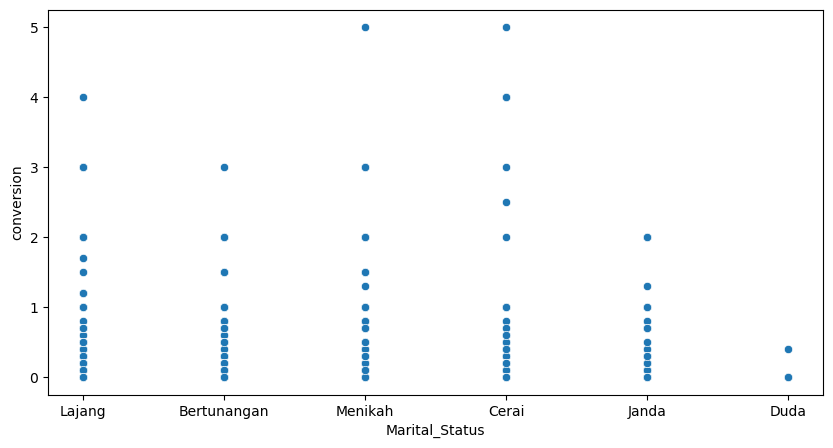

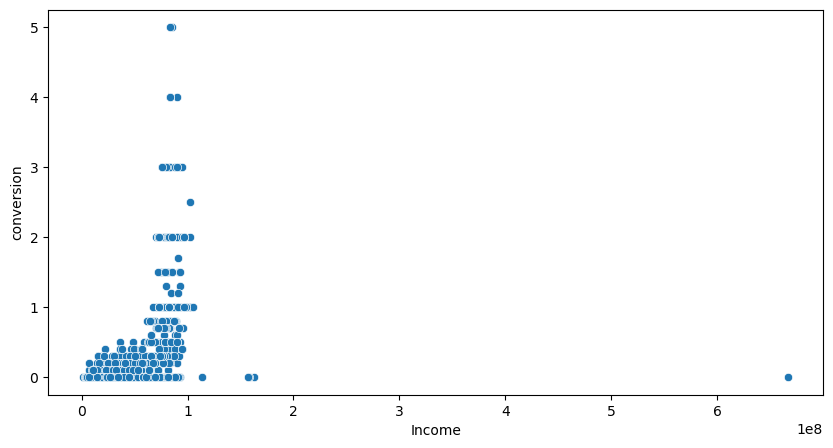

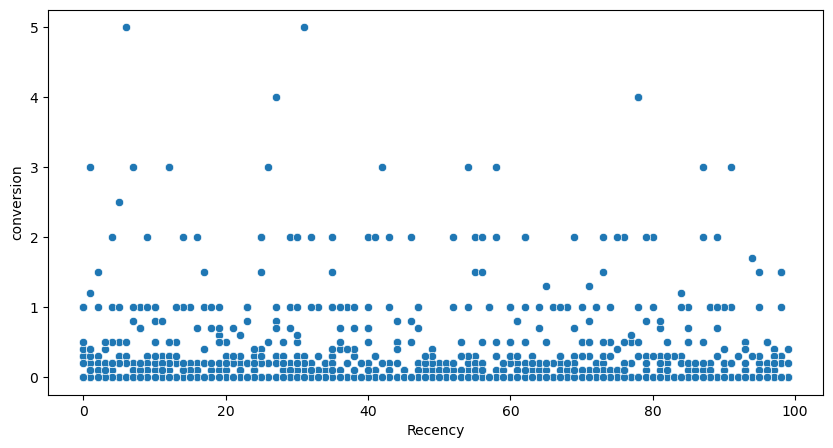

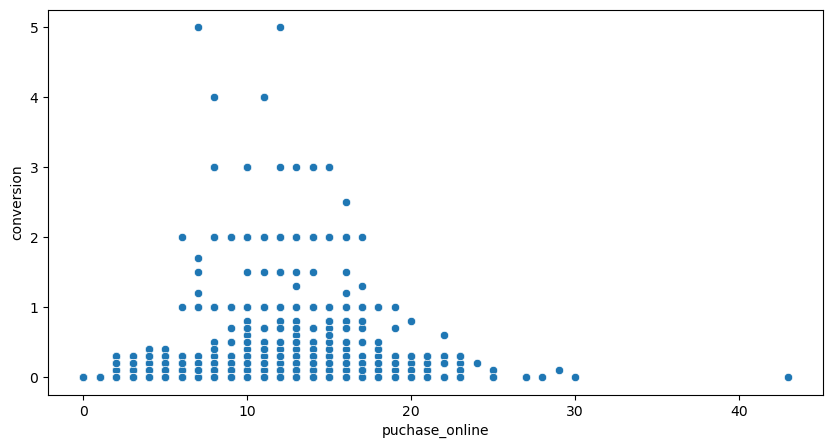

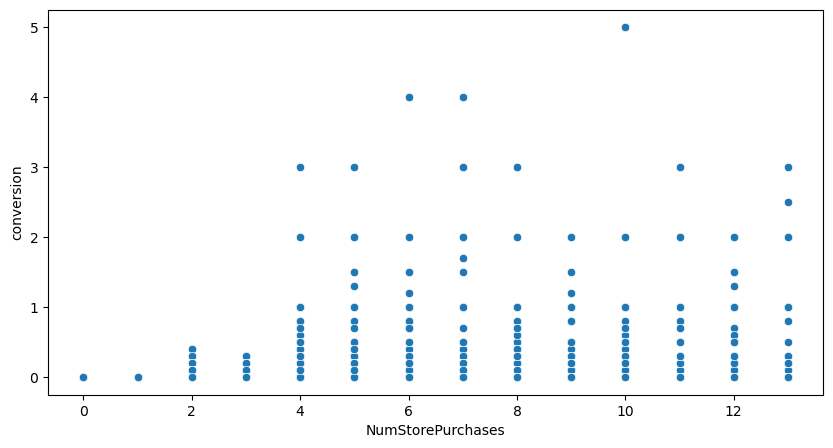

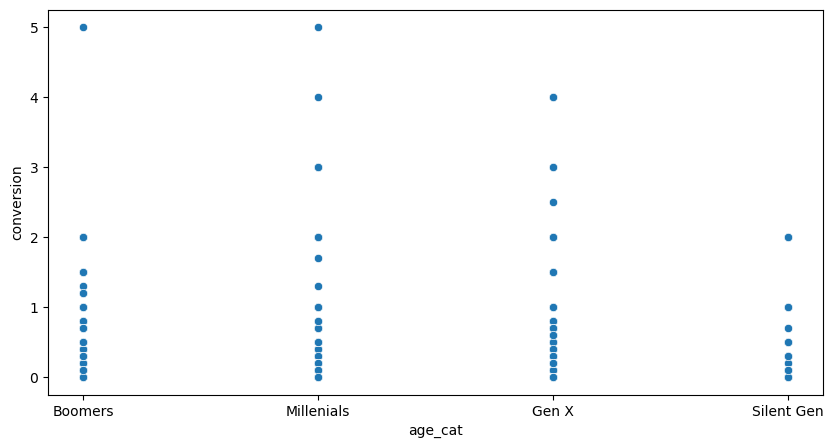

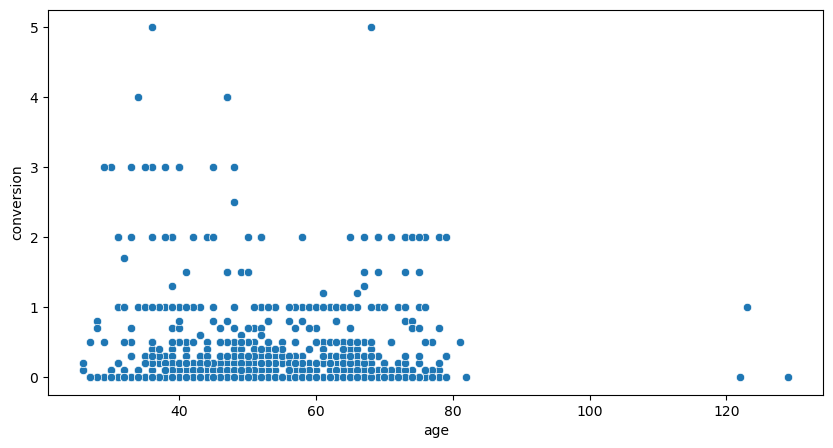

In [87]:
for i in cate:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = df5, x=i, y='conversion')
    plt.show()